# Iris classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris_data = np.loadtxt('iris.data',delimiter=',')

x_train = iris_data[1:-1:2,0:4]
y_train = np.int32(iris_data[1:-1:2,4])
x_test = iris_data[0:-1:2,0:4]
y_test = np.int32(iris_data[0:-1:2,4])

print(x_train.shape)

(74, 4)


In [3]:
from sklearn import svm
# model
model = svm.SVC(kernel='linear')
# train
model.fit(x_train,y_train)
# prediction
y_predicted=model.predict(x_test)
#evaluation
print('Percentage correct (accuracy) of SVM : ', np.mean(y_test == y_predicted))

Percentage correct (accuracy) of SVM :  0.9733333333333334
73.0


In [4]:
from sklearn.ensemble import RandomForestClassifier
# model
model = RandomForestClassifier(n_estimators=10)
# train
model.fit(x_train,y_train)
# prediction
y_predicted=model.predict(x_test)
#evaluation
print('Percentage correct (accuracy) of RFC : ', np.mean(y_test == y_predicted))

Percentage correct (accuracy) of RFC :  0.96


In [7]:
from sklearn.neural_network import MLPClassifier
#model
model= MLPClassifier(hidden_layer_sizes=(10, 20, 10))
# train
model.fit(x_train,y_train)
# prediction
y_predicted=model.predict(x_test)
#evaluation
print('Percentage correct (accuracy) of MLP : ', np.mean(y_test == y_predicted))

Percentage correct (accuracy) of MLP :  0.96


C:\Users\Thomas Trappenberg\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


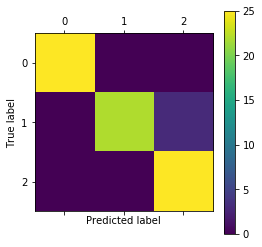

In [8]:
from sklearn import metrics, model_selection 
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [9]:
# Model Evaluation
print('\n The main classification metrics for iris data: \n\n',metrics.classification_report(y_test, y_predicted))


 The main classification metrics for iris data: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.88      0.94        25
           2       0.89      1.00      0.94        25

   micro avg       0.96      0.96      0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [10]:
# cross-validation
x = iris_data[:,0:4]
y = iris_data[:,4]
CV=10
scores = model_selection.cross_val_score(svm.SVC(kernel='linear'), x, y, cv=CV)

print("Accuracy on iris data: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))


Accuracy on iris data: 0.9733 (+/- 0.0442)
